# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "D:/python/SDC/Projects/P2/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/train.p"
testing_file = "D:/python/SDC/Projects/P2/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

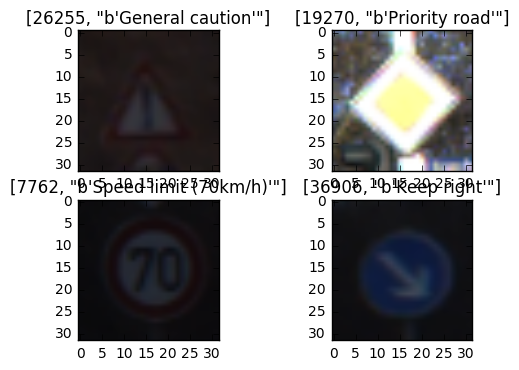

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

# some random data checking
sampleRandomImages = np.random.randint(0,len(X_train),size = 5)
sign_data = np.loadtxt('D:/python/SDC/Projects/P2/CarND-Traffic-Sign-Classifier-Project/signnames.csv', \
                           dtype=str,delimiter=',',skiprows = 1)
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.imshow(X_train[sampleRandomImages[0]])
ax1.set_title([sampleRandomImages[0], sign_data[int(y_train[sampleRandomImages[0]])][1]])
ax2.imshow(X_train[sampleRandomImages[1]])
ax2.set_title([sampleRandomImages[1], sign_data[int(y_train[sampleRandomImages[1]])][1]])
ax3.imshow(X_train[sampleRandomImages[2]])
ax3.set_title([sampleRandomImages[2], sign_data[int(y_train[sampleRandomImages[2]])][1]])
ax4.imshow(X_train[sampleRandomImages[3]])
ax4.set_title([sampleRandomImages[3], sign_data[int(y_train[sampleRandomImages[3]])][1]])

911.837209302
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43] [ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]


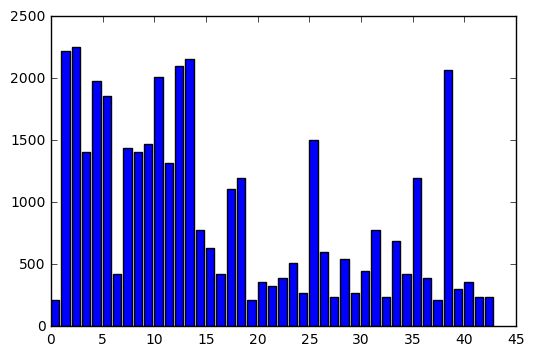

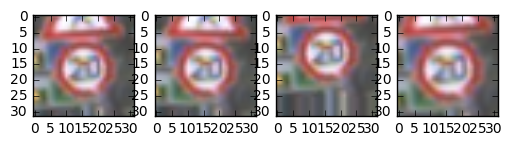

In [5]:
# combined view of data
# histogram
hist, bin_edges = np.histogram(y_train,bins =range(0,n_classes+1,1))
print(np.mean(hist))
print(bin_edges,hist)
# plot it
plt.bar(bin_edges[:-1],hist)
plt.show

# either rotate / shift or zoom to create more population for lower population category
f2, (img1,img2,img3,img4) = plt.subplots(1,4)
img1.imshow(X_train[0])
from scipy.ndimage import interpolation as imgInterpolation
img2.imshow(imgInterpolation.rotate(X_train[0],-5,reshape=False,mode = 'nearest'))
img3.imshow(imgInterpolation.shift(X_train[0],(-5,0,0),mode = 'nearest'))
from scipy import misc as imgZoom
tImg = imgInterpolation.zoom(X_train[0],(1.125,1.125,1),mode = 'nearest')
img4.imshow(tImg[2:34,2:34,:])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [127]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
### Generate data additional data (OPTIONAL!)
from scipy.ndimage import interpolation as imgInterpolation

def createSample(X_train,y_train,whichLabel,maxSamples):
    #assert(whichLabel>=0 & whichLabel<43)
    X_create = X_train[y_train==whichLabel]
    y_create = y_train[y_train==whichLabel]
    numIterations = maxSamples/len(X_create)
    if numIterations > 1.5: # if i increase this then too many number of samples will be pseudo generated.
        X_add = X_create
        y_add = y_create
        for i in range(int(np.round(numIterations))):
            # Random rotation angle between +/-5 to +/-10
            randomRotation = np.random.randint(-10,-5,size = len(X_create))
            randomRotation = np.append(randomRotation,np.random.randint(5,10,len(X_create)))
            np.random.shuffle(randomRotation)
            randomRotation = randomRotation[0:len(X_create)] # give random rotation (deg)
            # Random shift in pixels between +/-1 to +/-5 pixels
            randomShift = np.random.randint(-5,-1,size = len(X_create))
            randomShift = np.append(randomShift,np.random.randint(1,5,len(X_create)))
            np.random.shuffle(randomShift)
            randomShift = randomShift[0:len(X_create)+1] # give random shift (pixels)
            
            for iImage in range(0,len(X_create)):
                if iImage%2: # if even image then rotate
                    X_add = np.append(X_add,imgInterpolation.rotate(X_create[iImage],randomRotation[iImage],reshape=False,mode = 'nearest').reshape(1,32,32,3),axis=0)
                else: # if odd image then shift
                    X_add = np.append(X_add,imgInterpolation.shift(X_create[iImage],(randomShift[iImage],randomShift[iImage+1],0),mode = 'nearest').reshape(1,32,32,3),axis=0)
                    
                y_add = np.append(y_add,y_create[iImage])
    else: # already too many samples , just use original samples
        X_add = X_create
        y_add = y_create 

    return X_add,y_add

maxSamples = 1000
new_X_train, new_y_train = createSample(X_train,y_train,0,maxSamples)
for iClass in range(1,n_classes):
    X_add,y_add = createSample(X_train,y_train,iClass,maxSamples)
    new_X_train = np.append(new_X_train,X_add,axis=0)
    new_y_train = np.append(new_y_train,y_add,axis=0)

#histn, bin_edgesn = np.histogram(new_y_train,bins =range(0,n_classes+1,1))
#plt.bar(bin_edgesn[:-1],histn)

# Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** As the LeNet achieved more successful results on MNIST dataset when the images were grayscaled, I decided to use cv2 color to gray scale and then normalized the image with cv2 Normalization function to reach the solution (i.e. loss minima) quicker as shown in one of the lectures. 

Also, I found that in the dataset some of the labels were under-represented and that might train the model to skew towards over-represented data. Hence for labels which are in lower number, I applied the rotation and shifting of images to original dataset to increase number of samples .
No paddding required as the dataset is already suitable for LeNet architecture.

In [169]:
# Grayscale and normalize the image
import cv2

def grayNormalized(img):
    tempImg = cv2.cvtColor(img.astype(np.float32),cv2.COLOR_RGB2GRAY)
    normalizedImg = np.zeros(shape=img.shape)
    return cv2.normalize(tempImg.astype(np.float32), normalizedImg, 0, 1, cv2.NORM_MINMAX)

new_X_train_norm_gray = grayNormalized(new_X_train[0]).reshape(1,32,32,1)
for iImage in range(1,len(new_X_train)):
    new_X_train_norm_gray = np.append(new_X_train_norm_gray,grayNormalized(new_X_train[iImage]).reshape(1,32,32,1),axis = 0)
    #print(iImage/len(new_X_train))

#plt.imshow(new_X_train_norm_gray[0].squeeze(),cmap = 'gray')
len(new_X_train_norm_gray)
### Feel free to use as many code cells as needed.

1.5941590014188015e-05
3.188318002837603e-05
4.7824770042564044e-05
6.376636005675206e-05
7.970795007094008e-05
9.564954008512809e-05
0.00011159113009931611
0.00012753272011350412
0.00014347431012769212
0.00015941590014188016
0.00017535749015606817
0.00019129908017025618
0.0002072406701844442
0.00022318226019863222
0.00023912385021282023
0.00025506544022700823
0.00027100703024119624
0.00028694862025538425
0.0003028902102695723
0.0003188318002837603
0.0003347733902979483
0.00035071498031213633
0.00036665657032632434
0.00038259816034051235
0.00039853975035470036
0.0004144813403688884
0.00043042293038307643
0.00044636452039726444
0.00046230611041145244
0.00047824770042564045
0.0004941892904398285
0.0005101308804540165
0.0005260724704682045
0.0005420140604823925
0.0005579556504965805
0.0005738972405107685
0.0005898388305249565
0.0006057804205391446
0.0006217220105533326
0.0006376636005675206
0.0006536051905817086
0.0006695467805958967
0.0006854883706100847
0.0007014299606242727
0.000717371

KeyboardInterrupt: 

In [ ]:
### and split the data into training/validation/testing sets here.
from sklearn.utils import shuffle
new_X_train_norm_gray, new_y_train = shuffle(new_X_train_norm_gray, new_y_train)
from sklearn.model_selection import train_test_split
X_input, X_validation, y_input, y_validation = train_test_split(new_X_train_norm_gray,y_train,test_size = 0.6, random_state = 0)

'''
total_train = np.round(0.6*len(new_y_train)) # 60% of training data
end_validation = total_train + 1 + np.round(0.25*len(new_y_train)) # 25% of valinew_y_trainn and testing data

# Training data
X_input, y_input           = new_X_train_norm_gray[0:total_train], new_y_train[0:total_train]
# Model Validation data
X_validation, y_validation = new_X_train_norm_gray[total_train+1:end_validation], new_y_train[total_train+1:end_validation]
# Holy grail - testing the model
X_test, y_test             = new_X_train_norm_gray[end_validation+1:], new_y_train[end_validation+1:]
'''

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** First of as the new dataset which I generated were in sequence, I had to randomize (using shuffle) them for selection of training/validation and testing pools. It seems around 60 to 80% of data are normally used as training data, 25 to 15 % to validate the model and remaining to test the model. So to start with I selected 60% training / 25% validation and 15% testing.
Yes I generated additional dataset as I explained in previous question. 

In [ ]:
### Define your architecture here.
from tensorflow.contrib.layers import flatten
import tensorflow as tf

EPOCHS = 1
BATCH_SIZE = 128

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape = (5,5,1,6),mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides = [1,1,1,1], padding = 'VALID') + conv1_b
    
    # TODO: Activation.
    conv1   = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1   = tf.nn.max_pool(conv1, ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape = (5,5,6,16),mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1,conv2_W,strides = [1,1,1,1], padding = 'VALID') + conv2_b
    
    # TODO: Activation.
    conv2   = tf.nn.relu(conv2)    

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2   = tf.nn.max_pool(conv2,ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0     = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W   = tf.Variable(tf.truncated_normal(shape = (400,120),mean = mu, stddev = sigma))
    fc1_b   = tf.Variable(tf.zeros(120))
    fc1     = tf.add(tf.matmul(fc0,fc1_W),fc1_b)
    
    # TODO: Activation.
    fc1     = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W   = tf.Variable(tf.truncated_normal(shape = (120,84),mean = mu, stddev = sigma))
    fc2_b   = tf.Variable(tf.zeros(84))
    fc2     = tf.add(tf.matmul(fc1,fc2_W),fc2_b)
    
    # TODO: Activation.
    fc2     = tf.nn.relu(fc2)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W   = tf.Variable(tf.truncated_normal(shape = (84,10),mean = mu, stddev = sigma))
    fc3_b   = tf.Variable(tf.zeros(10))
    logits  = tf.add(tf.matmul(fc2,fc3_W),fc3_b)
    
    return logits

# Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

# Training pipeline
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


# Model evaluate
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** Looks exactly like LeNet architecture. But there is quite a lot possibility to improve the model for this particular case. Like I haven't spent enough time to play with different activation functions, strides, pooling, etc. 

In [ ]:
### Train your model here.
# Train the model
with tf.Session() as sess:
    sess.run(tf.reset_default_graph())
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_input)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_input, y_input = shuffle(X_input, y_input)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_input[offset:end], y_input[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'traffic-signs-model/')
    print("Model saved")
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I used same as LeNet , Adam optimizer and 128 images as my batch size. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Test your model
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint("lenet/"))
    saver.restore(sess,"traffic-signs-model/")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.